<a href="https://colab.research.google.com/github/Juanafenley/avanzadoIA/blob/main/Dataset_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelos Predictivos en SciKit-Learn


**Alumnos:**
- Juana Fenley
- Agustina Gonzalez Avola
- Vicente Brusa

**Curso:** 4ºC

**Año:** 2023


## Librerías y demás

In [171]:
# Importamos las librerías y demás cosas que vamos a utilizar
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import graphviz

## Ejercicio 1

Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [172]:
# Guardamos en una variable nuestro dataset y lo visualizamos
datos: pd.DataFrame = pd.read_csv('data.csv')
datos

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [173]:
# Eliminamos la columna de date ya que es cuando se registró cada dato y no nos sirve
datos.drop('date', axis=1, inplace=True)

datos.dtypes #Visualizamos las columnas del dataset y de qué tipo son sus datos

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [174]:
datos.shape #Vemos cuántas filas y columnas tiene nuestro dataset

(4600, 17)

El dataset que encontramos contiene 4599 muestras. Además, tiene 17 atributos (13 numéricos y 4 categóricos), entre ellos hay: precio, cantidad de pisos, cantidad de habitaciones y/o baños, ciudad y calle en la que se encuentra, entre otros.

## Ejercicio 2

**Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.**

### Gráfico 1

In [175]:
# Guardamos el dataset nuevamente en otra variable para así poder modificarlo sin afectar al resto del código
datos1: pd.DataFrame = pd.read_csv('data.csv')

In [176]:
# Convertimos la columna yr_renovated en booleanos:
datos1['yr_renovated'] = datos['yr_renovated'].astype(bool)

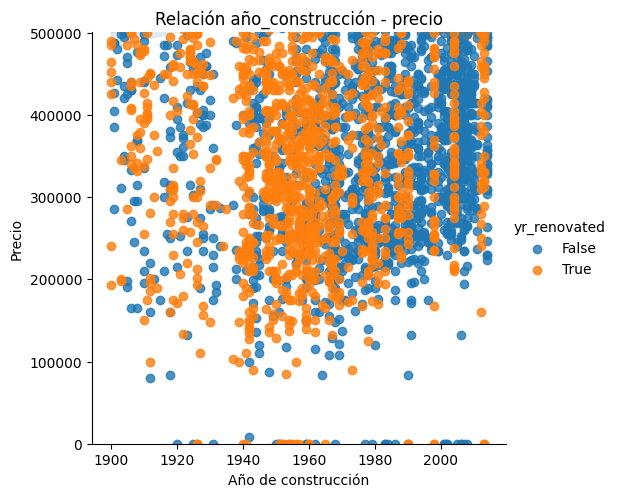

<Figure size 1300x1300 with 0 Axes>

In [177]:
# Creamos el gráfico
sb.lmplot(x='yr_built', y='price', hue='yr_renovated', data=datos1)
plt.ylabel('Precio')
plt.xlabel('Año de construcción')

# Título del gráfico
plt.title('Relación año_construcción - precio')

plt.ylim(0, 500500)
plt.figure(figsize=(13, 13))

plt.show() # Muestra el gráfico

**Análisis del gráfico**
En el gráfico podemos ver la relación entre el año en que cada casa fue construida y el precio. Asimismo, los puntos naranjas representan las casas que fueron renovadas y los azules las que no.
Para empezar, vemos como en sí hay muy pocas casas construidas antes de 1920/1930 y que estas no suelen ser tan caras. Además, podemos ver como muchísimas casas construidas para 1960 fueron renovadas y que están en general $300000 a $400000. Por último también vemos como disminuye la cantidad de casas renovadas a medida que los años avanzan (llegando a los 2000) y como el precio de las mismas aumenta.

### Gráfico 2

In [178]:
subset_datos1: pd.DataFrame = datos1.head(1000)

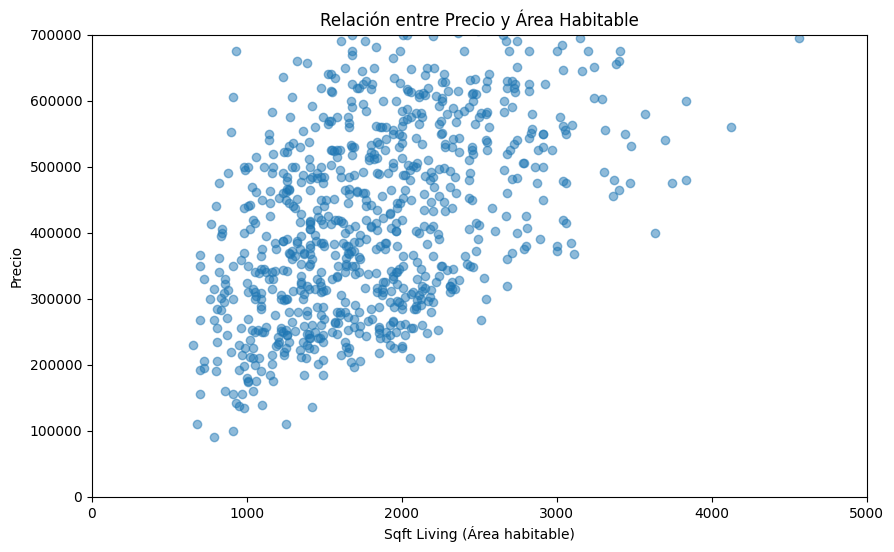

In [179]:
plt.figure(figsize=(10, 6))
x = subset_datos1['sqft_living']
y = subset_datos1['price']
plt.xlim(0, 5000)
plt.ylim(0, 700000)
plt.scatter(x, y, alpha=0.5)  # 'alpha' controla la transparencia de los puntos

plt.xlabel('Sqft Living (Área habitable)')
plt.ylabel('Precio')

plt.title('Relación entre Precio y Área Habitable')

plt.show()

**Análisis del gráfico**

Ahora lo que hicimos fue ver la relación del tamaño del área habitable de la casa y su precio. Como podemos ver en el gráfico claramente a medida que aumenta el espacio, aumenta el precio y viceversa. Podríamos hacer lo mismo con la cantidad de baños o cantidad de habitaciones y la relación sería la misma.

### Gráfico 3

In [180]:
ciudades : pd.Series = datos1['city'].value_counts()#Contamos cuantas veces aparece cada ciudad


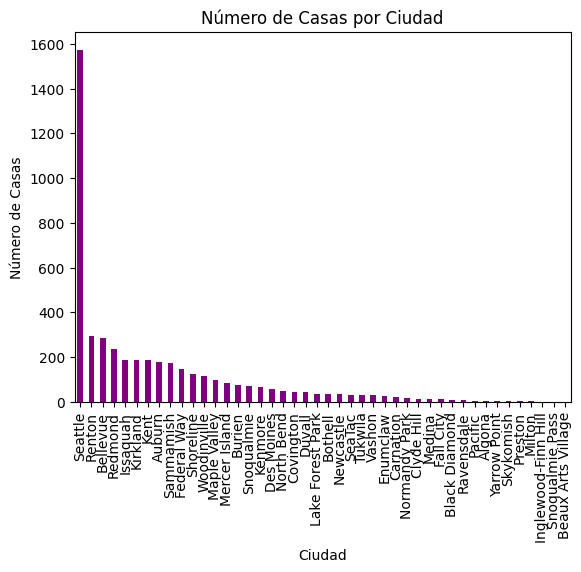

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [181]:
#Creamos el gráfico de barras
ciudades.plot(kind='bar', color='purple')
plt.xlabel('Ciudad')
plt.ylabel('Número de Casas')
plt.title('Número de Casas por Ciudad')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(20, 20))

In [182]:
# Hacemos un promedio de los precios de las casas en la ciudad con más casas, para comparar
promedio_precio_Seattle = datos1[datos1['city'] == 'Seattle']
promedio_precio_Seattle.price.mean()

579837.4672823235

In [183]:
# Hacemos un promedio de los precios de las casas en la ciudad con menos casas
promedio_precio_BAV = datos1[datos1['city'] == 'Beaux Arts Village']
promedio_precio_BAV.price.mean()

745000.0

**Análisis del gráfico**

En este gráfico podemos ver claramente cuáles son las ciudades del dataset que tienen más casas *registradas*. Por ejemplo, podemos ver que Seattle tiene aproximadamente 1600 casas mientras que SeaTac, Algona, Preston tienen menos de 200. Lo que probamos fue ver un promedio del precio de las casas en la ciudad con mayor cantidad y en la de menos y vimos que en Seattle el promedio de precios daba 579000 y en Beaux Arts Village 745000 así que quizá por esto se pueden dar tanta diferencia.

### Gráfico 4

In [184]:
# Agrupamos los datos por ciudad y calculamos el precio promedio de las casas en cada ciudad y los ordenamos de mayor a menor
city_prices = subset_datos1.groupby('city')['price'].mean().sort_values(ascending=False)

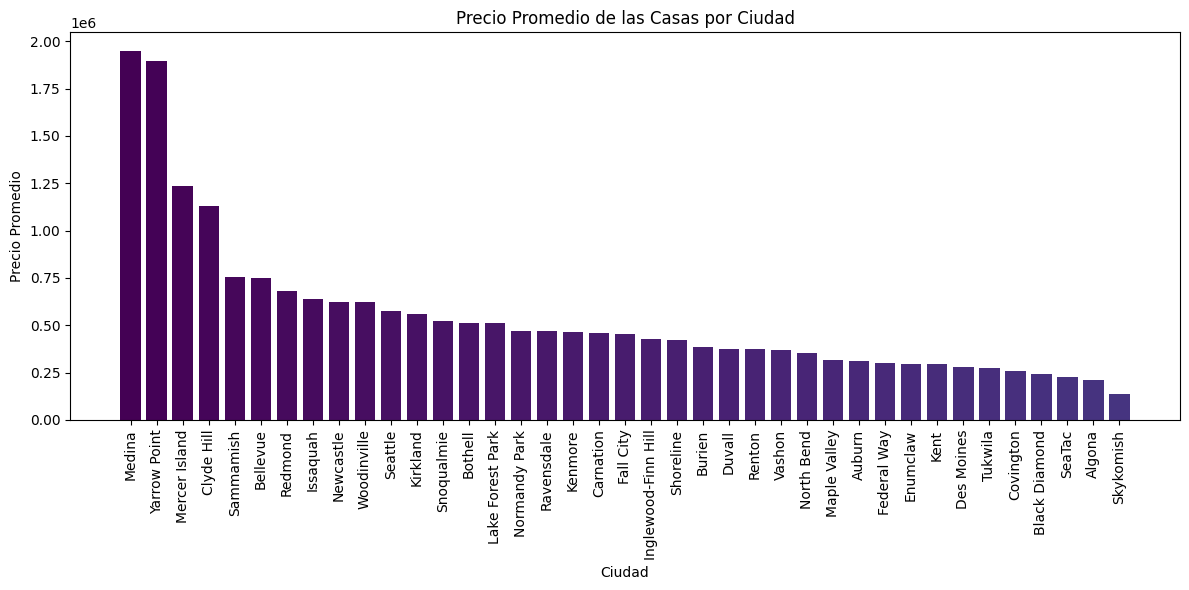

In [185]:
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(range(len(city_prices)))
plt.bar(city_prices.index, city_prices, color=colors)
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio de las Casas por Ciudad')
plt.xticks(rotation=90)

plt.tight_layout()  # Ajustamos el diseño para evitar recortes en los nombres
plt.show()

In [186]:
# Vemos el precio promedio de las casas de Medina
city_prices.get('Medina')

1950000.0

In [187]:
# Vemos el precio promedio de las casas de Skykomish
city_prices.get('Skykomish')

134000.0

**Análisis del gráfico**

En este gráfico vemos la relación entre las ciudades y el precio de las casas. Lo que hicimos fue hacer un promedio de los precios que aparecían en el dataset relacionados a cada ciudad y los comparamos. Por ejemplo, identificamos que Medina tiene los precios más altos, con un promedio de 1950000 USD, mientras que Skykomish los más bajos, con un promedio de 134000 USD.

## Ejercicio 3

**Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.**

Los atributos que elegimos son el precio ("price"), como atributo numérico, y la ciudad ("city") como atributo categórico.

In [188]:
# Intentamos utilizar OneHotEncoder pero no pudimos y decidimos utilizar LabelEncoder...
ohe= OneHotEncoder()
#ohe.fit(ciudades.reshape(-1, 1))
#datos.city=ohe.transform([ciudades.reshape(-1, 1)]).toarray()

In [189]:
# Convertimos los atributos categóricos en numéricos, asignando, por ejemplo, a cada ciudad un número distinto
le : LabelEncoder =LabelEncoder()
le.fit(datos.city)
datos.city=le.transform(datos.city)
le.fit(datos.street)
datos.street=le.transform(datos.street)
le.fit(datos.statezip)
datos.statezip=le.transform(datos.statezip)
datos

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,USA


## Ejercicio 4

**Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.**

In [190]:
# Definimos cuáles serían nuestras X e Y
x:pd.DataFrame=datos.drop(['price'],1)
X : pd.DataFrame = x.drop(['country'], axis=1)
y : pd.Series =datos.price

<ipython-input-190-9cdfd2131e5b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x:pd.DataFrame=datos.drop(['price'],1)


In [191]:
# Realizamos una partición de los datos en conjuntos de train y test.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X,y, test_size = 0.30)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
4198,4.0,1.75,1710,10440,1.0,0,0,4,1710,0,1955,2009,3024,3,5
199,3.0,1.50,1310,8160,1.0,0,0,3,1310,0,1950,2005,764,35,62
1735,3.0,2.25,1410,1290,2.0,0,0,3,1290,120,2004,2003,1801,16,15
3769,2.0,1.00,820,4320,1.0,0,0,3,820,0,1937,1999,4494,35,49
3572,3.0,2.50,2230,5348,2.0,0,0,3,2230,0,2000,0,3956,38,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,4.0,2.00,1350,942,3.0,0,0,3,1350,0,2008,0,4365,16,17
3398,3.0,2.50,1400,1312,3.5,0,0,3,1400,0,2007,0,2940,35,47
273,4.0,1.50,2310,13300,1.0,0,0,3,1890,420,1950,2005,4476,8,3
2242,3.0,2.00,2180,4976,1.5,0,2,4,1680,500,1930,0,2992,35,61


## Ejercicio 5

**Para el atributo numérico a predecir seleccionado:**

- Realizar un modelo de regresión lineal utilizando la clase LinearRegression de
SciKit-Learn.
- Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.

Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

Se recomienda utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

### Modelo de regresión lineal

In [192]:
# Creamos el modelo de regresión lineal para el atributo numérico elegido (price) y lo entrenamos
lr : LinearRegression = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [193]:
# Utilizamos cross_val_score para ver cómo le iba a nuestro modelo antes de darle nuestros datos de test
scores = cross_val_score(lr, X_train, Y_train, cv=15)
print (scores)
max(scores) # Visualizamos el máximo resultado de nuestra validación cruzada

[0.54895198 0.0834114  0.53530453 0.00635492 0.6200436  0.48653411
 0.60260047 0.3716867  0.54122706 0.6010041  0.42688239 0.56393828
 0.2729013  0.46273568 0.33640271]


0.6200436036753896

In [194]:
# Vemos cómo fue la performance de nuestro modelo
score : float = lr.score(X_test, Y_test)
print("Score en el conjunto de prueba:", score)

Score en el conjunto de prueba: 0.5264955997635452


### Árbol de decisión

In [195]:
# Creamos nuestro árbol de decisión
dtr : DecisionTreeRegressor = DecisionTreeRegressor()

In [285]:
# Guardamos en una variable los hiperparámetros a probar
parametrs : dict[str, list[int]] ={ 'max_depth':[4,7, 5, 3,6],
            'min_samples_split':[2 , 3, 5, 6, 12, 8],
            'min_samples_leaf':[ 2, 4, 8, 12, 32, 64],
            'max_features':[2, 3, 4, 5, 6, 7],
            'splitter':['best', 'random']
          }

In [279]:
# Utilizamos gridsearchCV para buscar la mejor combinación de los hiperparámetros dados
grid_search : GridSearchCV = GridSearchCV(dtr, parametrs, error_score='raise',cv=15)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=15, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7], 'max_features': [7],
                         'min_samples_leaf': [8], 'min_samples_split': [8],
                         'splitter': ['best', 'random']})

In [280]:
# Mostramos cuáles fueron los mejores hiperparámetros
grid_search.best_params_

{'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'splitter': 'best'}

In [281]:
# Mostramos cuál fue el score del modelo con esa combinación
grid_search.best_score_

0.7924403065209986

In [282]:
# Creamos nuestro árbol con los hiperparámetros que nos dio el GridSearch
best_tree=grid_search.best_estimator_

In [283]:
# Mostramos el score de nuestro árbol de decisión
best_tree.score(X_test, Y_test)

0.7429292041437179

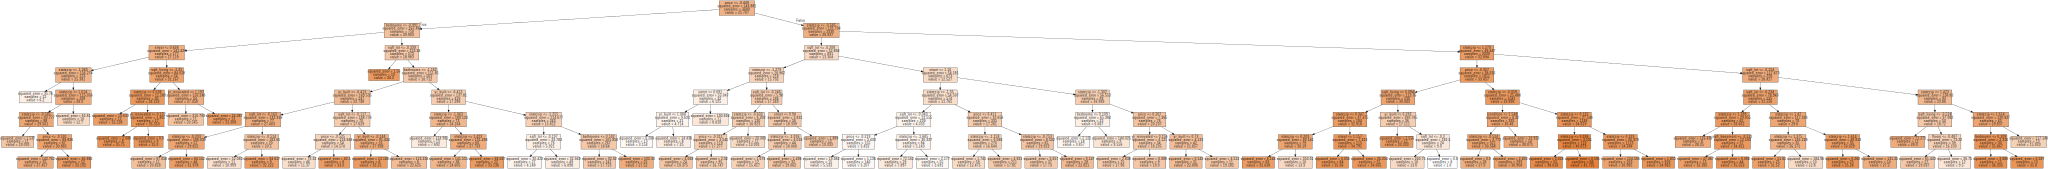

In [284]:
# Graficamos/mostramos un gráfico de nuestro árbol (con la combinación)

dot_data = tree.export_graphviz(best_tree, out_file=None,
                                feature_names=datos.columns.drop(['country','city']),
                                # class_names=X_train.target_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

### Preguntas

**¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?**

Nosotros evaluamos la performance de cada modelo comparando sus scores. Definimos cuál el mejor modelo aprovechando los conceptos de validación cruzada para ir viendo cómo le iría a nustro modelo antes de probarlo. Además, utilizamos GridSearch para encontrar los mejores hiperparámetros.
Aunque por lógica,  el árbol de decisión debería ser más preciso, la performance de nuestro modelo varía mucho. Si la performance es buena, el score es bastante más alto (llegando a ser 0.8) que el modelo de regresión lineal, pero si la performance es mala, el score es bastante más bajo (llegando a ser 0.2). Por este motivo, podemos decir que nuestro modelo de regresión lineal es más consistente, siempre dando un score que ronda los 0.6.

## Ejercicio 6

**Para el atributo categórico a predecir seleccionado**
- Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.
- Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.

**Responder las mismas preguntas que en el punto 5 para este caso.**

### LogisticRegression

In [286]:
# Declaramos nuestros X e Y de nuestros modelos para el atributo categórico a predecir
X : pd.DataFrame = datos.drop(['city','country'],1)
y : pd.Series = datos['city']

<ipython-input-286-f4bb3d547f69>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X : pd.DataFrame = datos.drop(['city','country'],1)


In [287]:
# Utilizamos SimpleImputer para llenar los valores faltantes en el conjunto de datos X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalizamos las características, que estén en la misma escala y tengan una distribución similar
from sklearn.preprocessing import StandardScaler
scaler : StandardScaler = StandardScaler()
X  = scaler.fit_transform(X)

In [288]:
# Separamos nuestros X e Y en daros de train y de test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [289]:
# Creamos nuestro modelo de regresión logística y lo entrenamos
lor : LogisticRegression= LogisticRegression(random_state=0)
lor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [290]:
# Vemos cuáles son las predicciones de Y para X_test
y_pred = lor.predict(X_test)

In [291]:
# Comparamos las predicciones con las Y_test y qué tan acertadas fueron
accuracy : float = accuracy_score(Y_test, y_pred)
accuracy

0.6347826086956522

### Decision Tree Classifier

In [325]:
# Creamos una variable con los hiperparámetros a probar
parametros : dict = {
  "max_depth" : [3, 5, 8, 4],
  "min_samples_split" : [4, 8, 16, 32, 64, 128],
  "min_samples_leaf" : [4, 8, 16, 32, 64, 128],
  "criterion" : ["gini", "entropy"]
}

In [326]:
# Creamos nuestro árbol de decisión para predecir el atributo categórico
dtc : DecisionTreeClassifier = DecisionTreeClassifier()

In [327]:
# Utilizamos RandomSearch para encontrar, entre combinaciones aleatorias que hace, la mejor
random_search : RandomizedSearchCV= RandomizedSearchCV(dtc,parametros,cv=5)
random_search.fit(X_train,Y_train) # Entrenamos

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 8, 4],
                                        'min_samples_leaf': [4, 8, 16, 32, 64,
                                                             128],
                                        'min_samples_split': [4, 8, 16, 32, 64,
                                                              128]})

In [328]:
# Vemos cuál fue la mejor combinación de hiperparámetros que nos dio el RandomSearch
random_search.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 16,
 'max_depth': 8,
 'criterion': 'entropy'}

In [329]:
# Visualizamos cuál es el score con esta combinación de hiperparámetros
random_search.best_score_

0.9323369565217391

In [330]:
#Entrenamos el árbol sin utilizar los hiperparámetros del Randomsearch
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [331]:
#Creamos un modelo  utilizando la mejor combianción de hiperparámetros del Randomsearch
dtc_best : DecisionTreeClassifier =random_search.best_estimator_

In [332]:
# Vemos cuáles son las predicciones de Y para X_test
y_pred = dtc_best.predict(X_test)

In [333]:
# Comparamos las predicciones con las Y_test
accuracy : float = accuracy_score(Y_test, y_pred)
accuracy

0.9434782608695652

In [334]:
# Vemos cómo le va a nuestro modelo sin la combinación de hiperparámetros
y_pred = dtc.predict(X_test)
accuracy : float = accuracy_score(Y_test, y_pred)
accuracy

0.9565217391304348

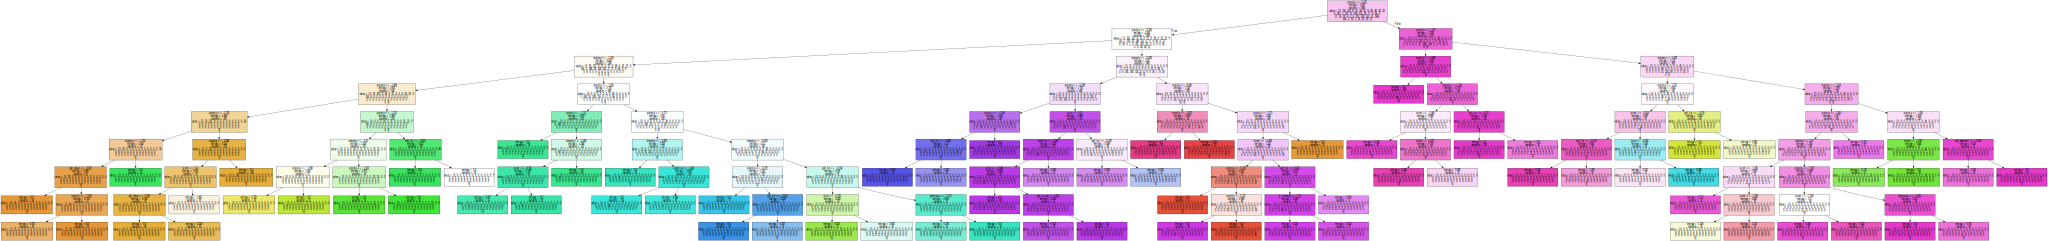

In [335]:
# Graficamos/mostramos un gráfico de nuestro árbol (con la combinación)

dot_data = tree.export_graphviz(dtc_best, out_file=None,
                                feature_names=datos.columns.drop(['country','city']),
                                # class_names=X_train.target_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

### Preguntas

**¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?**

Como en el ejercicio anterior, evaluamos los resultados de cada modelo de acuerdo a su performance (definida por el score). En este caso, elegimos el mejor árbol utilizando RandomSearch que elegía combinaciones de hiperparámetros al azar (dentro de los hiperparámetros que nosotros le pasábamos) y nos devolvía la mejor.

A diferencia del ejercicio 5, a nuestro árbol de decisión le va mucho mejor que a nuestro modelo regresión logística, con una diferencia de 0.3 entre sus scores.


## Ejercicio 7

**Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?**

Algunos de los métodos de validación cruzada que vimos fueron: K-fold y Leave-One-Out. Ambos métodos tienen sus ventajas y desventajas, son distintos.

Por un lado, K-fold consiste en dividir lso datos de training en n folds (grupos de datos) y en cada vuelta de la validación deja un grupo afuera con el que evalúa la performance del modelo luego de haberlo entrenado con los demás. Una de las desventajas que nosotros identificamos es que el modelo se entrenará con menos datos, lo que podría "afectar" su performance. A pesar de eso, es un método de validación cruzada bastante rápido, lo cual es una gran ventaja.
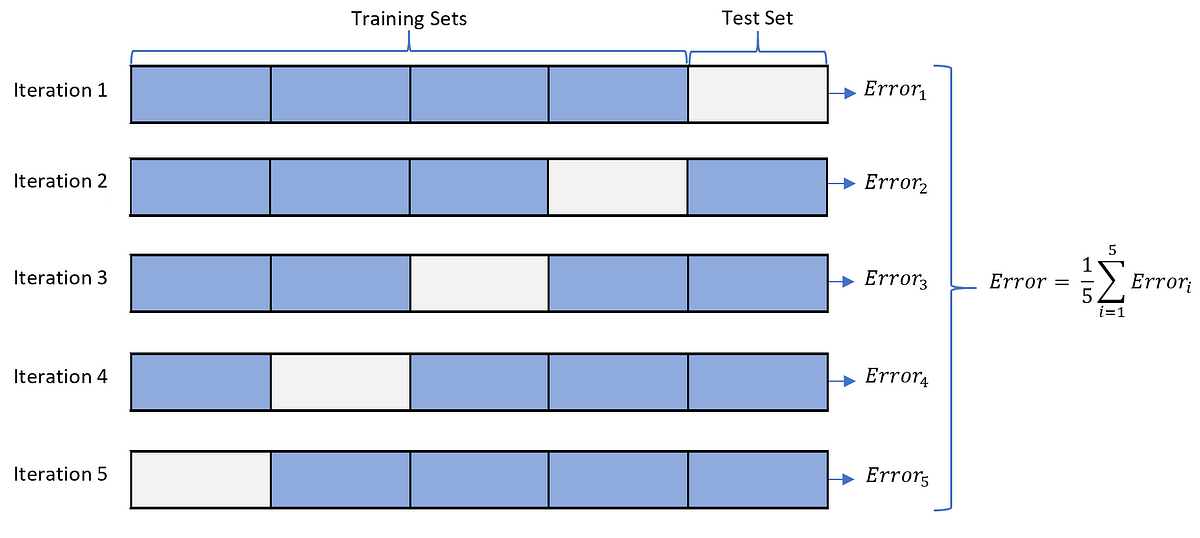

Por otro lado, Leave-One-Out es un método que consiste en dejar una muestra afuera y entrenar al modelo con las demás. Una de las principales desventajas es que, si nuestro dataset tiene muchas muestras, la validación tardará mucho tiempo. Por otro lado, a diferencia de K-fold, la cantidad de datos de training prácticamente no se ve afectada, por lo que la performance de nuestro modelo tampoco.
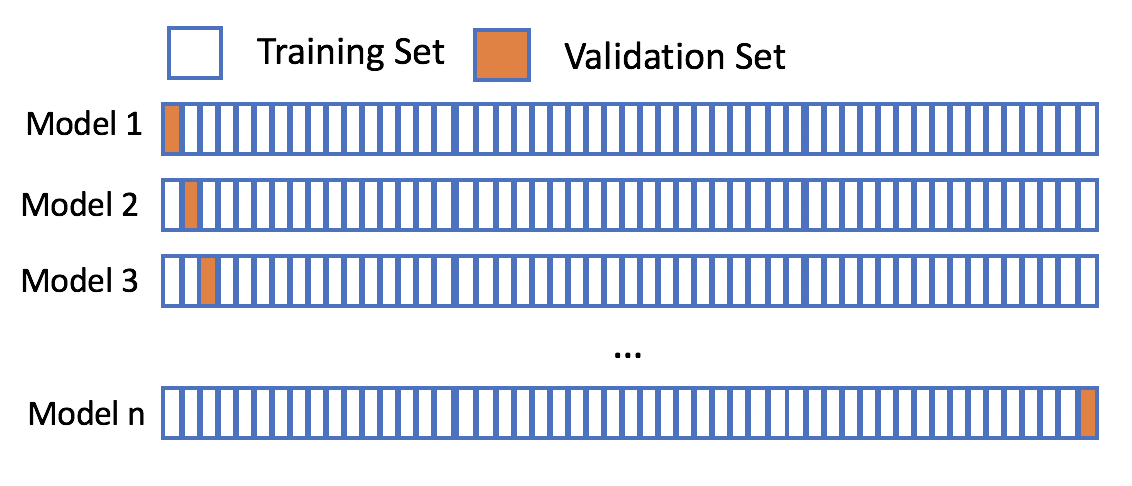

## Ejercicio 8

**Escribir una conclusión sobre el trabajo realizado.**

Este trabajo sobre modelos Predictivos en SciKit-Learn nos llevó a experimentar con el aprendizaje automático. Fue un poco complicado al principio, tuvimos que investigar bastante para entender cómo funcionan los modelos de regresión lineal, logística y árboles de decisiones. Pero a medida que avanzamos, comenzamos a ver cómo estos modelos pueden ser buenas herramientas para predecir cosas y tomar decisiones basadas en datos.

Asimismo, comparando los modelos realizados, podemos ver que a nuestros modelos que buscaban predecir atributos categóricos les fue bastante mejor a que los que buscaban predecir atributos numéricos.

Además, llegamos a la conclusión de que nuestro dataset quizá no era el mejor. Sin "ajustar" los modelos, nuestros puntajes eran bastante bajos. Sin embargo, parte del desafío (y del trabajo en sí) es encontrar formas de hacer que funcionen.

**Biblografía**:

[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[https://aprendeia.com/arboles-de-decision-clasificacion-scikit-learn-machine-learning/](https://aprendeia.com/arboles-de-decision-clasificacion-scikit-learn-machine-learning/)

[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning-practica-con-python/](https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning-practica-con-python/)

[https://mljar.com/blog/visualize-decision-tree/](https://mljar.com/blog/visualize-decision-tree/)

[https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/](https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/)

[https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/#:~:text=Grid%20search%20is%20the%20simplest,performance%20metrics%20using%20cross%2Dvalidation](https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/#:~:text=Grid%20search%20is%20the%20simplest,performance%20metrics%20using%20cross%2Dvalidation)

[https://cienciadedatos.net/documentos/py07_arboles_decision_python](https://cienciadedatos.net/documentos/py07_arboles_decision_python)

# BONUS

**Investigar los métodos GridSearch y RandomSearch para la búsqueda de hiperparámetros. Utilizarlos para encontrar los mejores hiperparámetros para los modelos.**  **✓**

**Para ya sea el atributo categórico como para el numérico, elegir otro modelo de clasificación o regresión que no haya sido utilizado anteriormente. Entrenar el modelo y comparar los resultados con los obtenidos anteriormente.**



Encontramos un modelo que se llama k-Nearest Neighbor. En este caso, lo vamos a utilizar para predecir la ciudad en base a algunos atributos numéricos. ¿Cómo funciona kNN? Lo que hace es calcular la distancia entre la muestra a clasificar y el resto de las muestras del dataset de entrenamiento, selecciona una x cantidad (k) de elementos más cercanos y realiza una “votación de mayoría” entre los k puntos.


https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Definimos X e Y
X = datos.drop(['city','country'],1)
y : pd.Series = datos['city']


<ipython-input-220-d1bda4520ff3>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = datos.drop(['city','country'],1)


In [221]:
# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Escalamos X train y test para un mejor resultado
scaler : StandardScaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [222]:
# Usamos GridSearch para buscar el mejor hiperparámetros
parametros1 : dict = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21]}
grid_search : GridSearchCV = GridSearchCV(KNeighborsClassifier(), parametros1, cv=5)
grid_search.fit(X_train, y_train)
best_n_neighbors : int= grid_search.best_params_['n_neighbors']


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [223]:
# Creamos el modelo con el mejor valor de n_neighbors encontrado
knn : KNeighborsClassifier= KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [224]:
# Predecimos
y_pred = knn.predict(X_test)

In [225]:
# Evaluamos el modelo
accuracy : float = accuracy_score(y_test, y_pred)
print('Precisión del modelo KNN con', best_n_neighbors, 'vecinos:', accuracy)

# Realizamos una validación cruzada para una mejor evaluación
cv_scores = cross_val_score(knn, X, y, cv=10)
print('Puntuaciones de Validación Cruzada:', cv_scores)

Precisión del modelo KNN con 5 vecinos: 0.6079710144927536


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Puntuaciones de Validación Cruzada: [0.35652174 0.33043478 0.31304348 0.34347826 0.36521739 0.33478261
 0.34565217 0.3173913  0.30652174 0.26956522]


La verdad que el score no es el mejor pero queríamos demostrar que podíamos encontrar otro modelo y aplicarlo. Nuevamente llegamos a la conclusión de que quizá nuestro dataset no es el mejor por los distintos scores que obtuvimos (tan variados entre sí).